In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
import numpy as np
import cv2
import os
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.utils import to_categorical, plot_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_path='/content/drive/My Drive/Colab Notebooks/ANN_CNN_chest_Xray_Pneumonia_detection/chest_xray/train'
test_path='/content/drive/My Drive/Colab Notebooks/ANN_CNN_chest_Xray_Pneumonia_detection/chest_xray/test'

In [ ]:
import os

In [ ]:
print(os.listdir(train_path))

['PNEUMONIA', 'NORMAL']


In [ ]:
print(os.listdir(test_path))

['NORMAL', 'PNEUMONIA']


In [ ]:
# Initialize image data generator with rescaling
train_data_gen = ImageDataGenerator(rescale=1./255)
test_data_gen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Preprocess all train images
train_generator = train_data_gen.flow_from_directory(
        '/content/drive/My Drive/Colab Notebooks/ANN_CNN_chest_Xray_Pneumonia_detection/chest_xray/train',
        target_size=(48, 48),
        batch_size=32,
        color_mode="grayscale",
        class_mode='categorical')

Found 5216 images belonging to 2 classes.


In [ ]:
# Preprocess all test images
test_generator = test_data_gen.flow_from_directory(
        '/content/drive/My Drive/Colab Notebooks/ANN_CNN_chest_Xray_Pneumonia_detection/chest_xray/test',
        target_size=(48, 48),
        batch_size=32,
        color_mode="grayscale",
        class_mode='categorical')

Found 624 images belonging to 2 classes.


In [ ]:
# create model structure
from keras.models import Sequential
pheumonia_detection_model = Sequential()

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
pheumonia_detection_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
pheumonia_detection_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
pheumonia_detection_model.add(MaxPooling2D(pool_size=(3, 3)))
pheumonia_detection_model.add(Dropout(0.25))

In [ ]:
pheumonia_detection_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
pheumonia_detection_model.add(MaxPooling2D(pool_size=(3, 3)))
pheumonia_detection_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
pheumonia_detection_model.add(MaxPooling2D(pool_size=(2, 2)))
pheumonia_detection_model.add(Dropout(0.25))

In [ ]:
pheumonia_detection_model.add(Flatten())
pheumonia_detection_model.add(Dense(1024, activation='relu'))
pheumonia_detection_model.add(Dropout(0.5))
pheumonia_detection_model.add(Dense(2, activation='softmax'))

In [ ]:
pheumonia_detection_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 128)        0         
 2D)                                                    

In [ ]:
import cv2
cv2.ocl.setUseOpenCL(False)

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
pheumonia_detection_model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.01), metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# Train the neural network/model
pheumonia_model_info = pheumonia_detection_model.fit(
        train_generator,
        steps_per_epoch=5216 // 32,
        epochs=5,
        validation_data=test_generator,
        validation_steps=624 // 32)

Epoch 1/5
163/163 [==============================] - 1234s 7s/step - loss: 0.6346 - accuracy: 0.7419 - val_loss: 0.7483 - val_accuracy: 0.6283
Epoch 2/5
163/163 [==============================] - 56s 346ms/step - loss: 0.5737 - accuracy: 0.7429 - val_loss: 0.6851 - val_accuracy: 0.6217
Epoch 3/5
163/163 [==============================] - 56s 347ms/step - loss: 0.5731 - accuracy: 0.7429 - val_loss: 0.7154 - val_accuracy: 0.6217
Epoch 4/5
163/163 [==============================] - 57s 351ms/step - loss: 0.5728 - accuracy: 0.7429 - val_loss: 0.6883 - val_accuracy: 0.6201
Epoch 5/5
163/163 [==============================] - 56s 342ms/step - loss: 0.5726 - accuracy: 0.7429 - val_loss: 0.6818 - val_accuracy: 0.6250


In [ ]:
import json
pheumonia_model_info.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

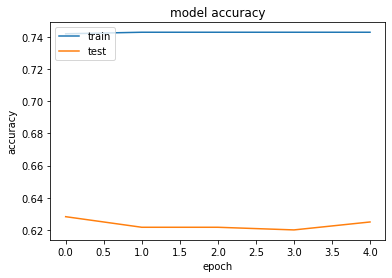

In [ ]:
plt.plot(pheumonia_model_info.history['accuracy'])
plt.plot(pheumonia_model_info.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

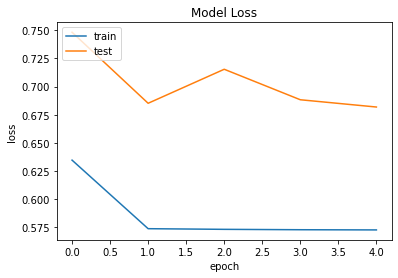

In [ ]:
plt.plot(pheumonia_model_info.history['loss'])
plt.plot(pheumonia_model_info.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()